In [1]:
print("hello meow!!")

hello meow!!


In [6]:
## importing all necessary libraries

import pandas as pd

file_path = '/Users/HP/Desktop/Starbucks_rs/starbucks_drinks.csv'
sbdrinks_data = pd.read_csv(file_path)

(107, 10)

In [9]:
sbdrinks_data.head()

,490,is_hot,is_cold,is_frozen,calories,espresso_shots,non-coffee_ingreedients,is_coffee,is_tea,is_not_coffee_or_tea
0,Americano,1,0,0,0.030612,1.000000,0.000000,1,0,0
1,Blended Strawberry Lemonade,0,0,1,0.387755,0.000000,0.153846,0,0,1
2,Blonde Vanilla Latte,1,0,0,0.510204,0.666667,0.538462,1,0,0
3,Caffe Latte,1,0,0,0.387755,0.666667,0.230769,1,0,0
4,Caffe Mocha,1,0,0,0.755102,0.666667,0.615385,1,0,0


In [11]:
sbdrinks_data.columns

Index(['490', 'is_hot', 'is_cold', 'is_frozen', 'calories', 'espresso_shots',
       'non-coffee_ingreedients', 'is_coffee', 'is_tea',
       'is_not_coffee_or_tea'],
      dtype='object')

In [14]:
sbdrinks_data.rename(columns={'490': 'Drink_name'}, inplace=True)

In [16]:
## basic eda 

In [22]:
drink_counts = sbdrinks_data['is_hot'].value_counts()
print(drink_counts)


drink_counts = sbdrinks_data['is_cold'].value_counts()
print(drink_counts)

drink_counts = sbdrinks_data['is_frozen'].value_counts()
print(drink_counts)

is_hot
0    72
1    35
Name: count, dtype: int64
is_cold
0    58
1    49
Name: count, dtype: int64
is_frozen
0    84
1    23
Name: count, dtype: int64


In [31]:
## applying k means 
# Assuming 'sbdrinks_data' is your DataFrame containing standardized features
features_scaled = sbdrinks_data[['is_hot', 'is_cold', 'is_frozen', 'calories', 'espresso_shots', 
                                  'non-coffee_ingreedients', 'is_coffee', 'is_tea', 'is_not_coffee_or_tea']].values


/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

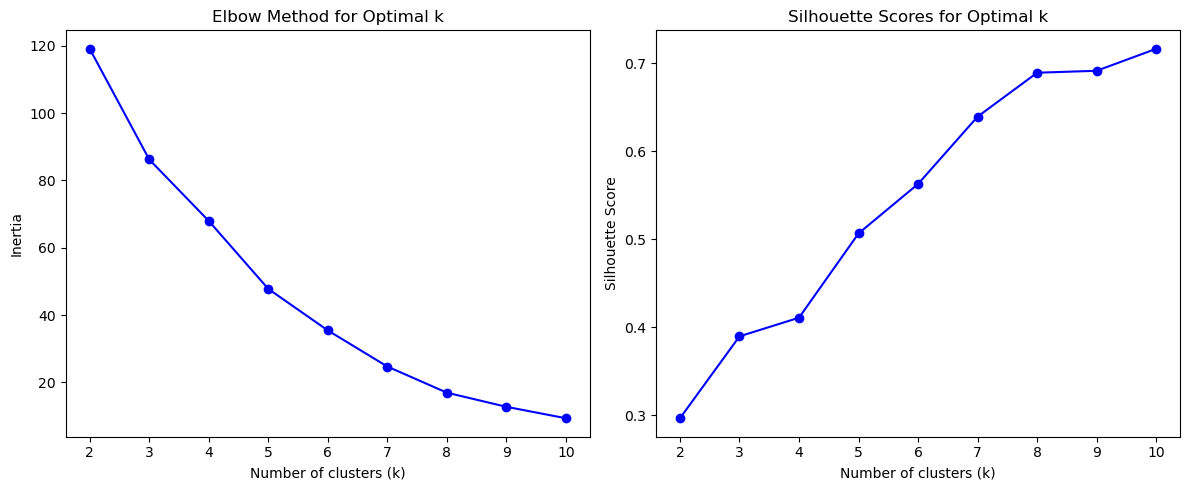

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the elbow method and silhouette score
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(features_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the elbow method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal k')

plt.tight_layout()
plt.show()


In [73]:
from sklearn.cluster import KMeans

# Choose the optimal number of clusters (e.g., k=4)
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(features_scaled)

# Assign cluster labels back to the original DataFrame
sbdrinks_data['cluster_label'] = kmeans.labels_

# Check cluster centers
print("Cluster centers:")
print(kmeans.cluster_centers_)


Cluster centers:
[[ 3.52941176e-01  1.11022302e-16  6.47058824e-01  6.59063625e-01
  -8.32667268e-17  4.38914027e-01  1.11022302e-16 -5.55111512e-17
   1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -5.55111512e-17  2.86530612e-01
   4.26666667e-01  2.12307692e-01  1.00000000e+00 -1.11022302e-16
  -5.55111512e-17]
 [ 1.00000000e+00  1.11022302e-16  5.55111512e-17  3.92557023e-01
   6.47058824e-01  2.80542986e-01  1.00000000e+00 -5.55111512e-17
   5.55111512e-17]
 [ 0.00000000e+00  1.00000000e+00  5.55111512e-17  1.67346939e-01
  -8.32667268e-17  1.43589744e-01  1.66533454e-16  1.00000000e+00
   8.32667268e-17]
 [ 5.55111512e-17  5.55111512e-17  1.00000000e+00  7.94217687e-01
   2.77777778e-02  6.60256410e-01  8.33333333e-01  1.66666667e-01
   5.55111512e-17]
 [ 0.00000000e+00  1.00000000e+00  5.55111512e-17  2.49433107e-01
  -5.55111512e-17  1.02564103e-01  0.00000000e+00  0.00000000e+00
   1.00000000e+00]
 [ 1.00000000e+00  5.55111512e-17  5.55111512e-17  1.59863946e-01
  -5.551115

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


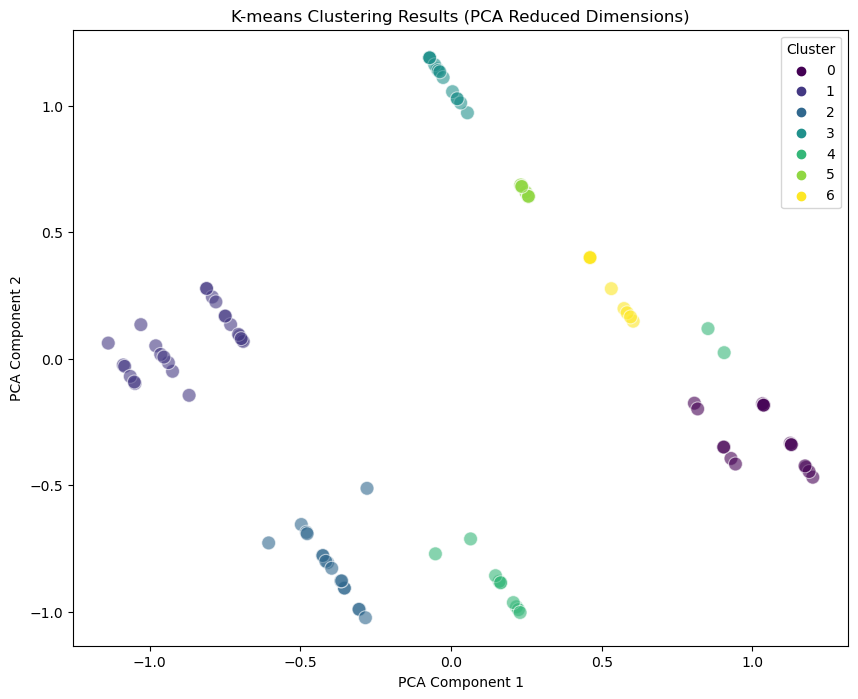

In [74]:
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Add PCA results to the DataFrame
sbdrinks_data['pca_1'] = features_pca[:, 0]
sbdrinks_data['pca_2'] = features_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sbdrinks_data, x='pca_1', y='pca_2', hue='cluster_label', palette='viridis', s=100, alpha=0.6)
plt.title('K-means Clustering Results (PCA Reduced Dimensions)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [75]:
class Person:
    def __init__(self, name: str, age: int):
        self.name = name
        self.age = age

    def greet(self):
        print(f"Hello, my name is {self.name} and I am {self.age} years old.")
        
my_person  = Person("nihith",24)


my_person.greet()


Hello, my name is nihith and I am 24 years old.
